In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pathlib
import csv
import os
import numpy as np
import math
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv
from MFDFA import MFDFA
from MFDFA import fgn

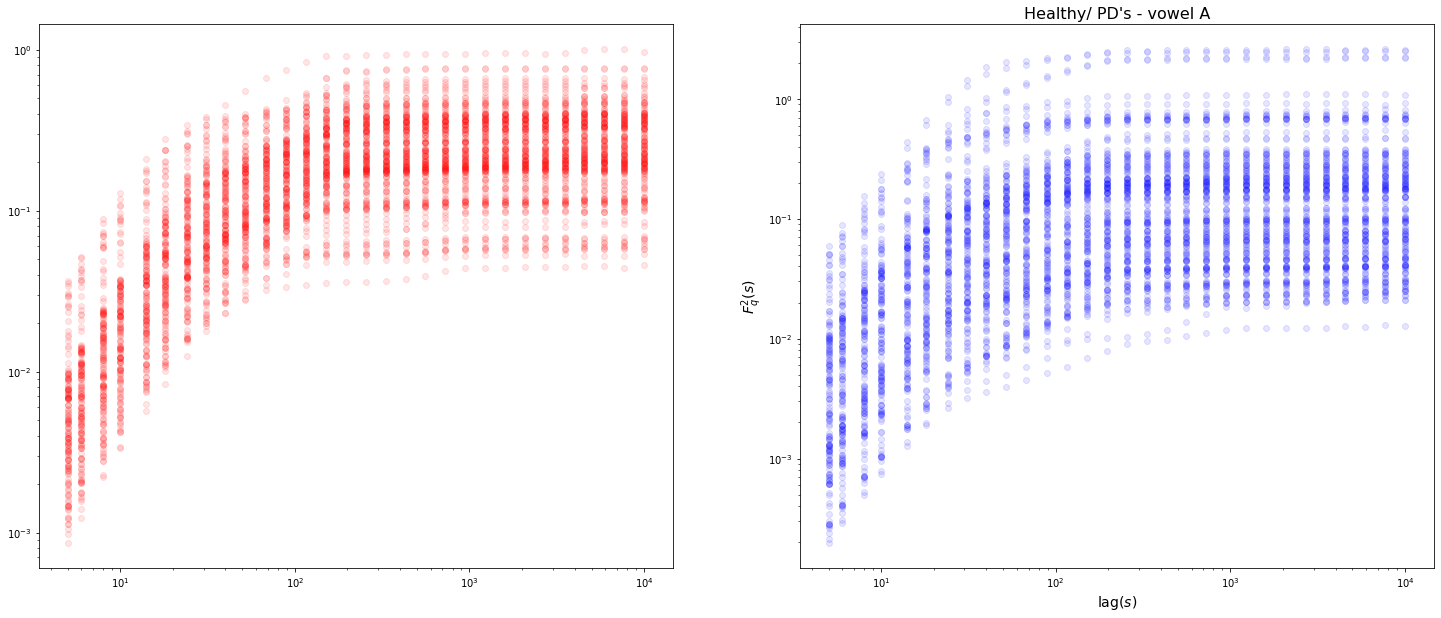

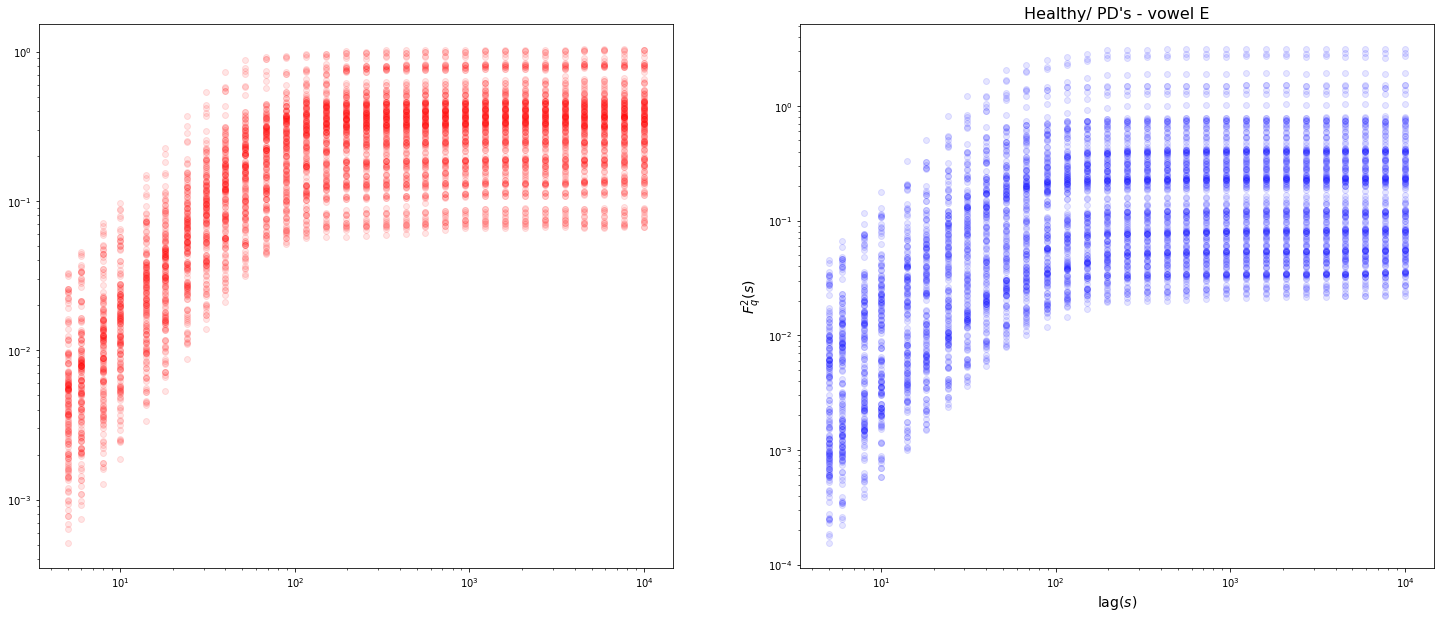

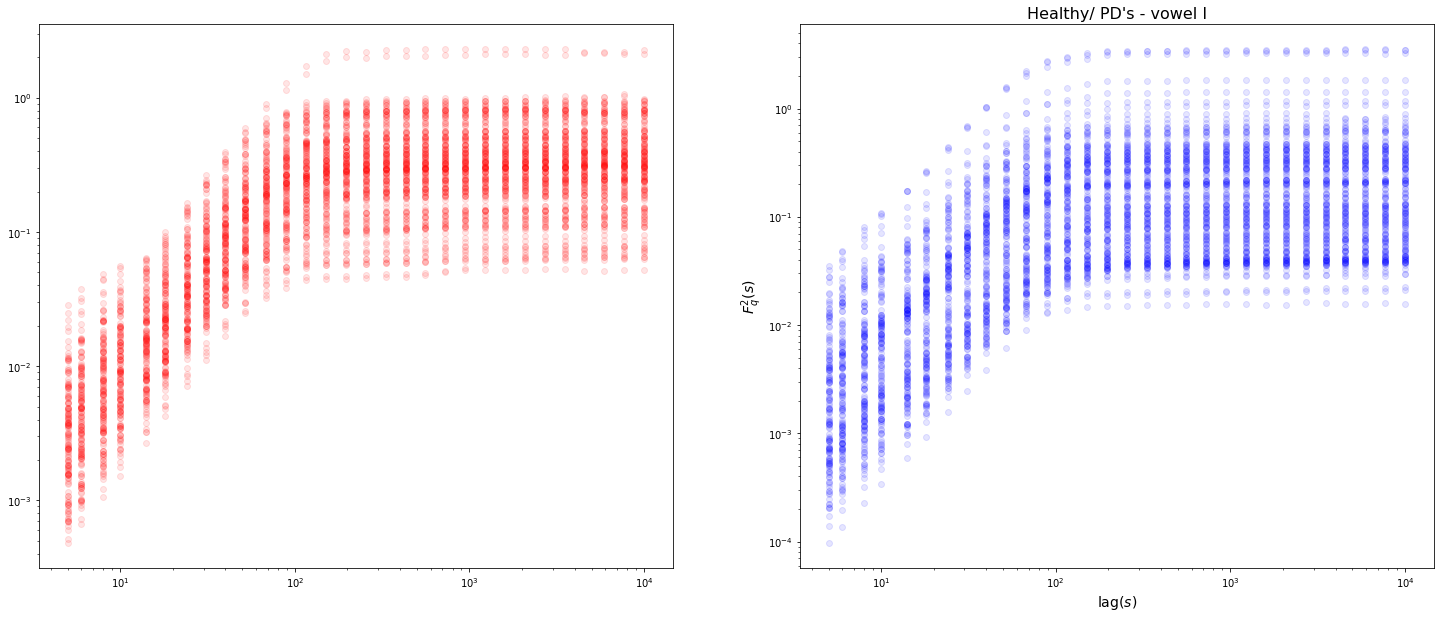

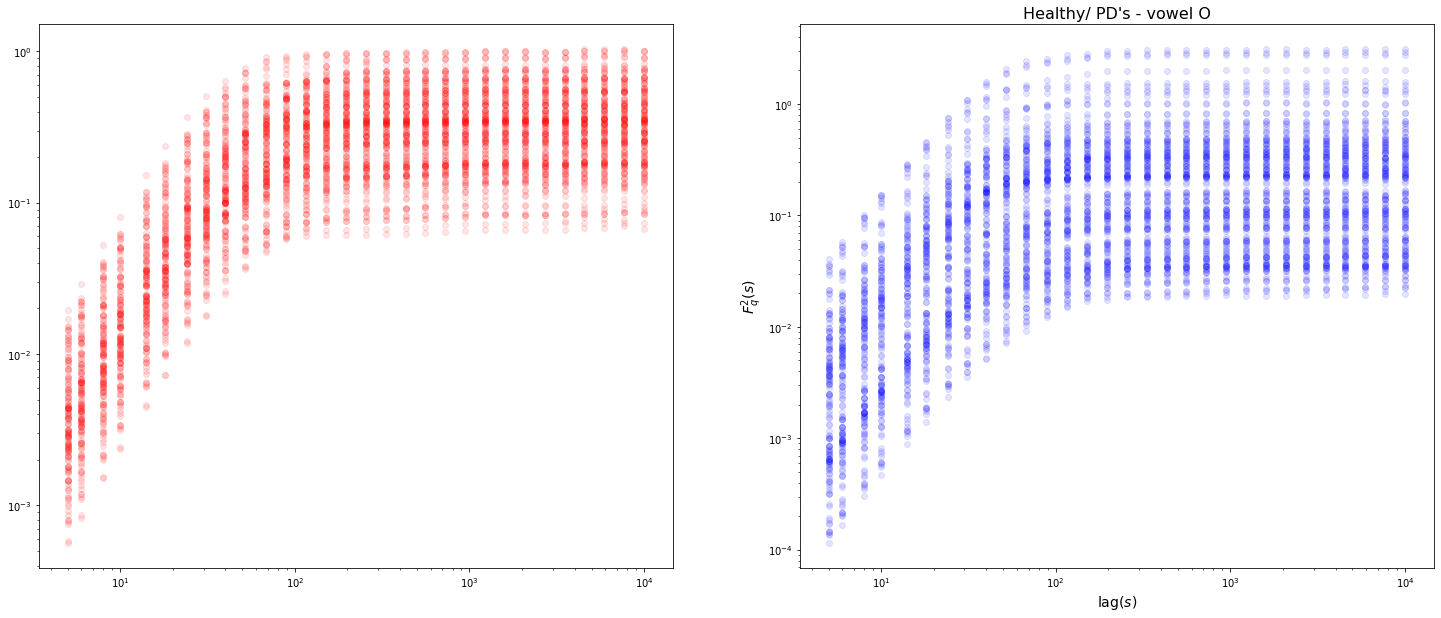

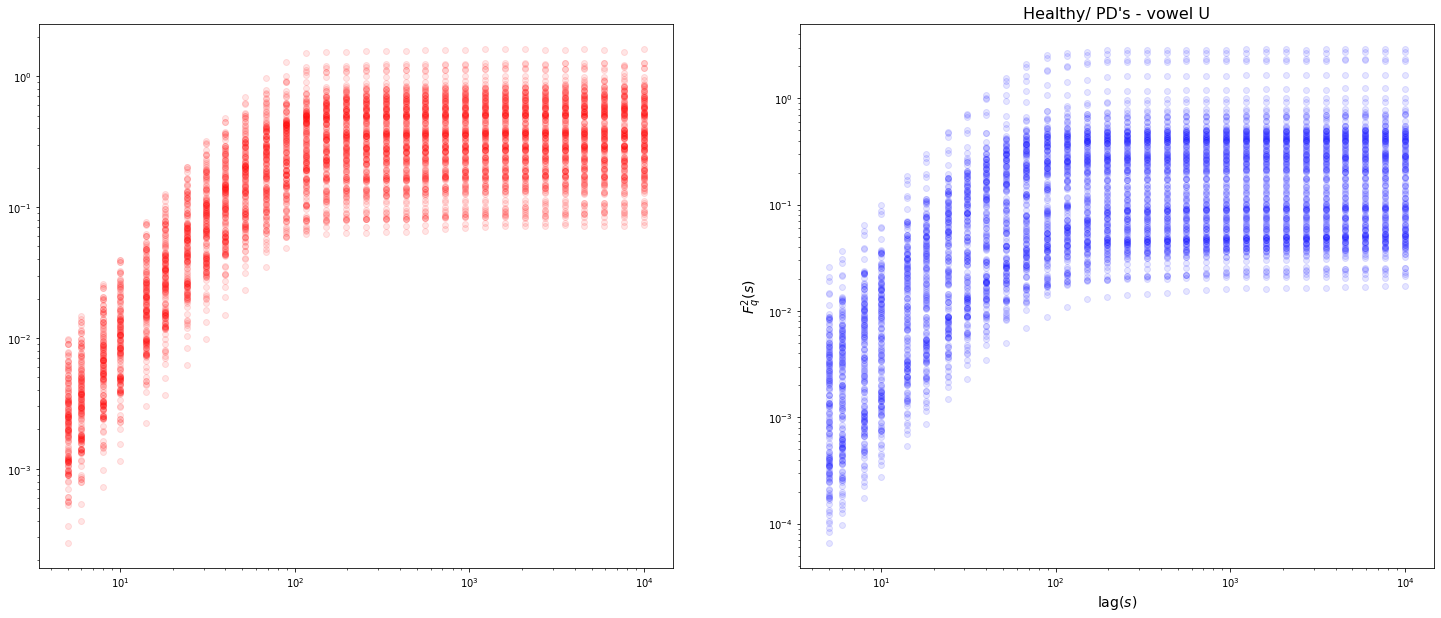

In [4]:
controls = 'Control Patologicas'.split()
vowels = 'A E I O U'.split()
for v in vowels:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    title = 'Healthy/ PD\'s - vowel ' + v 
    plt.title (title, fontsize = 16)
    plt.xlabel (r'lag($s$)', fontsize=14)
    plt.ylabel (r'$F_{q}^{2}(s)$', fontsize=14)
    
    for c in controls:
        pathlib.Path(f'D:/Licentza/Stuff/img_data/Vowels/{v}').mkdir(parents=True, exist_ok=True)
        for filename in os.listdir(f'D:/Licentza/Datasets/PC-GITA_per_task_44100Hz/Vowels/{c}/{v}'):
            recordingname = f'D:/Licentza/Datasets/PC-GITA_per_task_44100Hz/Vowels/{c}/{v}/{filename}'
            y, sr = librosa.load(recordingname, mono=True, duration = 1.0)
            t_max = len(y)
            delta = 1
            time_iter = np.arange(0, t_max, delta)
            lag = np.logspace(0.7, 4, 30).astype(int)

            # Select the power q
            q = 2

            # The order of the polynomial fitting
            order = 1

            # Obtain the (MF)DFA as

            lag_y, dfa_y = MFDFA(y, lag = lag, q = q, order = order)
            
            if (c == 'Patologicas'):
                color = 'ro'
                nr = 1
            else:
                color = 'bo'
                nr = 2
            plt.subplot(1, 2, nr)
            plt.loglog(lag_y, dfa_y, color, alpha = 0.1)
            np.polyfit(np.log(lag_y[:15]), np.log(dfa_y[:15]),1)[0]
            
          
            
            
        plt.savefig(f'D:/Licentza/Stuff/img_data/Vowels/{v}/MDFAseparate_withfigsize.png')


# Trying for one vowel - get the best fitting..............

Loading the audio data...

In [25]:
base_directory = "D:\\Licentza\\Datasets\\PC-GITA_per_task_44100Hz\\Vowels"

In [26]:
hc_file_a = base_directory + "\\Control\\E\\AVPEPUDEAC0001e1.wav"

In [27]:
pd_file_a = base_directory + "\\Patologicas\\E\\AVPEPUDEA0001e1.wav"

In [28]:
hc_a, sr = librosa.load(hc_file_a, mono=True, duration=1)
pd_a, _ = librosa.load(pd_file_a, mono=True, duration=1)

MDFA

In [29]:
hc = hc_a
pd = pd_a

In [30]:
t_max = len(hc)

In [31]:
delta = 1
time_iter = np.arange(0, t_max, delta)
lag = np.logspace(0.7, 4, 30).astype(int)

# Select the power q
q = 2

# The order of the polynomial fitting
order = 1

# Obtain the (MF)DFA as

lag_hc, dfa_hc = MFDFA(hc, lag = lag, q = q, order = order)
lag_pd, dfa_pd = MFDFA(pd, lag = lag, q = q, order = order)

Trying with polyfit here........

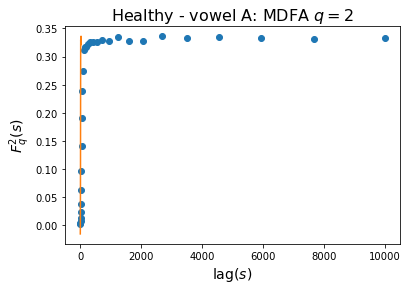

In [17]:
plt.title ('Healthy - vowel A: MDFA $q=2$', fontsize = 16)
plt.xlabel (r'lag($s$)', fontsize=14)
plt.ylabel (r'$F_{q}^{2}(s)$', fontsize=14)

plt.plot(lag_hc, dfa_hc, 'o')
poly = np.polyfit(lag_hc, dfa_hc, 65)


x = np.linspace(1, lag_hc[-1], 10000)

plt.plot(np.polyval(poly, lag_hc))







Idk trying with curve_fit...................

In [18]:
def objective(x, a, b):
	return a + b*np.log(x)

In [19]:
dfa_hc.shape

(30, 1)

In [20]:
# fit curve
popt, _ = curve_fit(objective, lag_hc, dfa_hc.flatten())
a, b = popt

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(lag_hc), max(lag_hc), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)

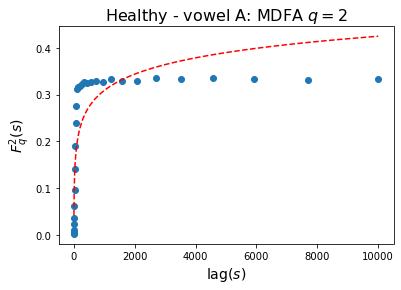

In [21]:
plt.title ('Healthy - vowel A: MDFA $q=2$', fontsize = 16)
plt.xlabel (r'lag($s$)', fontsize=14)
plt.ylabel (r'$F_{q}^{2}(s)$', fontsize=14)

plt.plot(lag_hc, dfa_hc, 'o')
plt.plot(x_line,y_line, '--', color='red')

Another try, but different..............

In [32]:
def objective(x, a, b, c, d, g):
    return ( ( (a-d) / ( (1+( (x/c)** b )) **g) ) + d )

In [33]:
# fit curve
popt, _ = curve_fit(objective, lag_hc, dfa_hc.flatten())
a, b, c, d, g = popt

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(lag_hc), max(lag_hc), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, g)

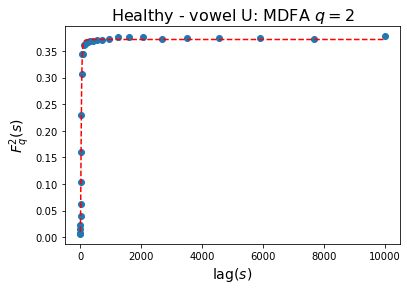

In [34]:
plt.title ('Healthy - vowel U: MDFA $q=2$', fontsize = 16)
plt.xlabel (r'lag($s$)', fontsize=14)
plt.ylabel (r'$F_{q}^{2}(s)$', fontsize=14)

plt.plot(lag_hc, dfa_hc, 'o')
plt.plot(x_line,y_line, '--', color='red')